# 303A Supervised Learning - Project

In [1]:
#import dependencies
import pandas as pd
import preprocess
from neural_network import neural_network

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression #for Logistic Regression
from sklearn import svm # for Support Vector Machine
from sklearn.naive_bayes import GaussianNB # for Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier 
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.tree import DecisionTreeClassifier # for decision tree classifier

# Preprocessing

In [2]:
## Read the wisconsin dataset
breast_ca = pd.read_csv('Dataset/breast-cancer-wisconsin.data',index_col=None,header=None)

## Run clean_impute function on dataset and save dataset (impute - MICE method)
df_impute = preprocess.clean_impute(breast_ca)
df_impute.to_csv('Dataset/processed/breast-cancer-wisconsin-imputed.csv',index=False)

## Read imputed wisconsin dataset
df = pd.read_csv("Dataset/processed/breast-cancer-wisconsin-imputed.csv")

Columns renaming successful
All '?' values replaced with 'NaN'

Calculate missing values from dataframe
sample_id            0
cl_thcknss           0
size_cell_un         0
shape_cell_un        0
marg_adhesion        0
size_cell_single     0
bare_nucl           16
bl_chrmatn           0
nrml_nucleo          0
mitoses              0
class                0
dtype: int64

Null values imputated using Multivariate Imputation by Chained Equation (MICE) method

Calculate missing values from imputated dataframe
sample_id           0
cl_thcknss          0
size_cell_un        0
shape_cell_un       0
marg_adhesion       0
size_cell_single    0
bare_nucl           0
bl_chrmatn          0
nrml_nucleo         0
mitoses             0
class               0
dtype: int64



In [3]:
# Remove the sample_id column
df = df.drop(columns=['sample_id'])

# Split the dataset into features/variables (X) and labels/outcome (y)
# Change values of 'class' from [2,4] to [0,1]
X = df.drop(columns=['class'])
y = df['class'].apply(lambda x: 1 if x == 4 else 0)

In [4]:
# Scale the features - Min and Max scaling (sensitive to outliers)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Descriptive Statistics

In [5]:
#---To view the top 5 rows of the dataset
#---To confirm the values are same as the original dataset

print('The top 5 rows of the dataset:')
df.head()

The top 5 rows of the dataset:


,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2


In [6]:
#---To view the total number of columns and rows in the dataset

print(f'''
Number of columns in dataset : {df.shape[1]}
\n
Number of rows in dataset : {df.shape[0]}
''')


Number of columns in dataset : 10


Number of rows in dataset : 699



In [7]:
#---Detect datatype for each column and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cl_thcknss        699 non-null    float64
 1   size_cell_un      699 non-null    float64
 2   shape_cell_un     699 non-null    float64
 3   marg_adhesion     699 non-null    float64
 4   size_cell_single  699 non-null    float64
 5   bare_nucl         699 non-null    float64
 6   bl_chrmatn        699 non-null    float64
 7   nrml_nucleo       699 non-null    float64
 8   mitoses           699 non-null    float64
 9   class             699 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 54.7 KB


In [8]:
#---To view the description of data in the dataframe

df.describe()

,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.526567,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.618696,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.605359,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.955306,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
#---To observe the skewness of the dataframe

df.skew()

cl_thcknss          0.592859
size_cell_un        1.233137
shape_cell_un       1.161859
marg_adhesion       1.524468
size_cell_single    1.712172
bare_nucl           1.002818
bl_chrmatn          1.099969
nrml_nucleo         1.422261
mitoses             3.560658
class               0.654564
dtype: float64

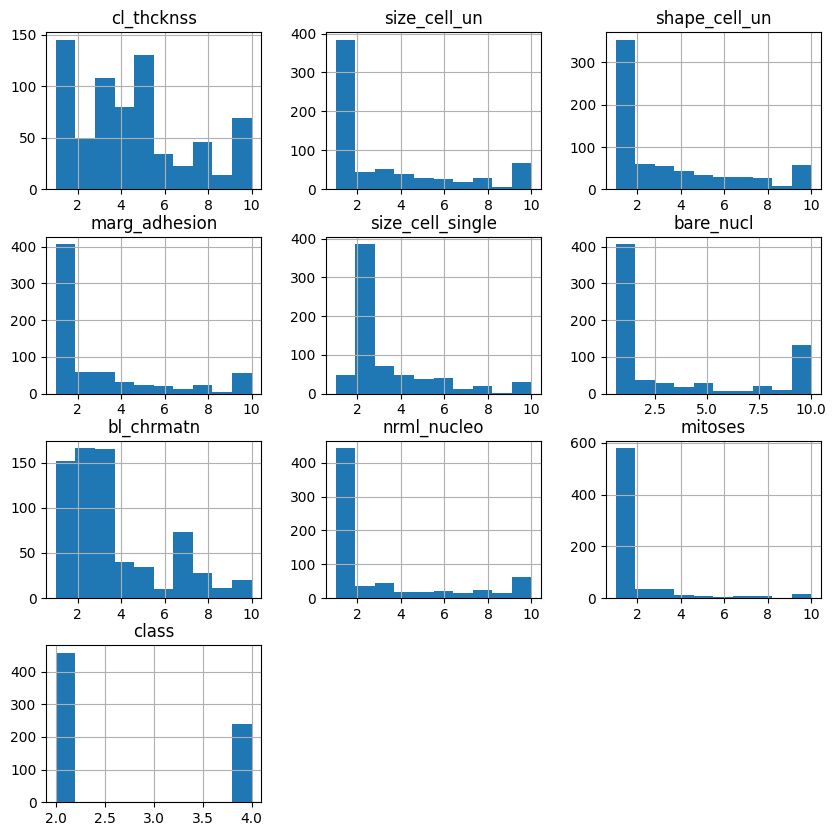

In [10]:
#---Histograms

df.hist(figsize=(10,10))
plt.show()

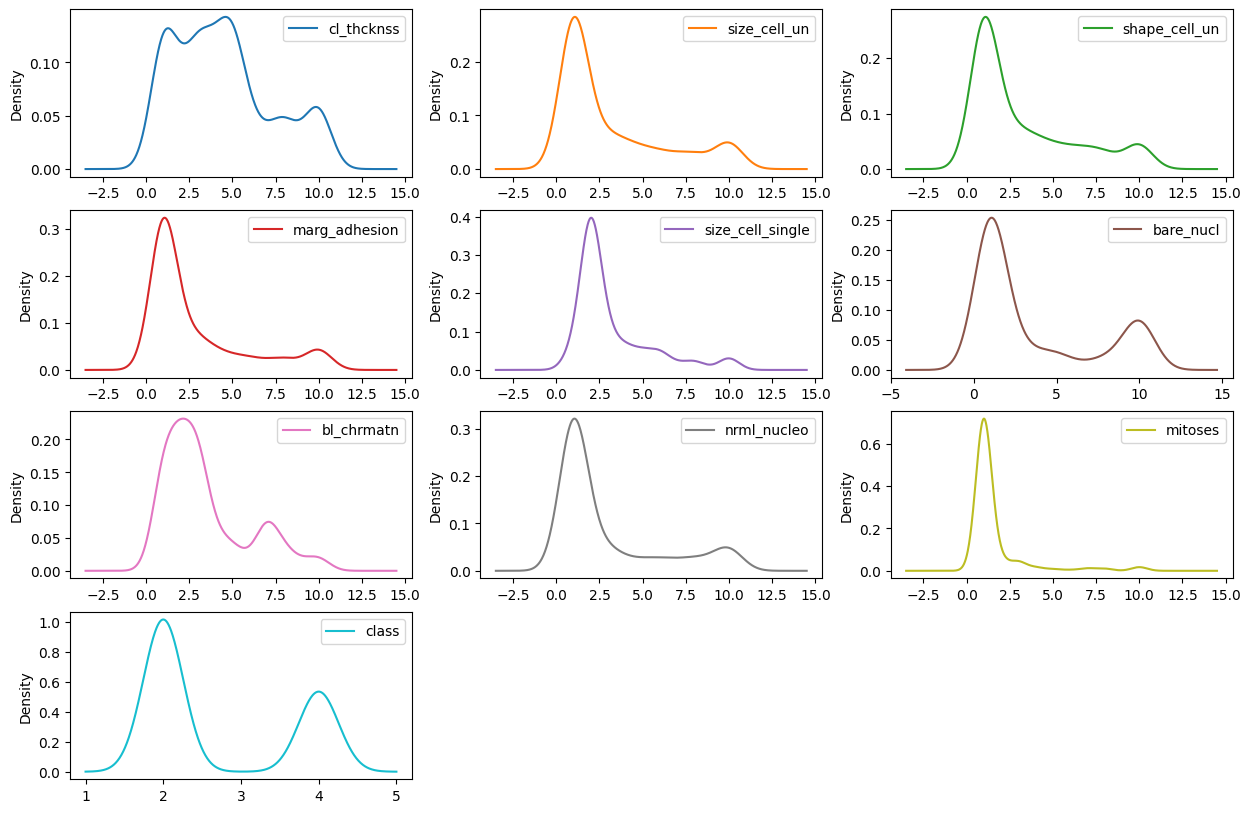

In [11]:
#---Density Plots

df.plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize=(15,10)) 
plt.show()

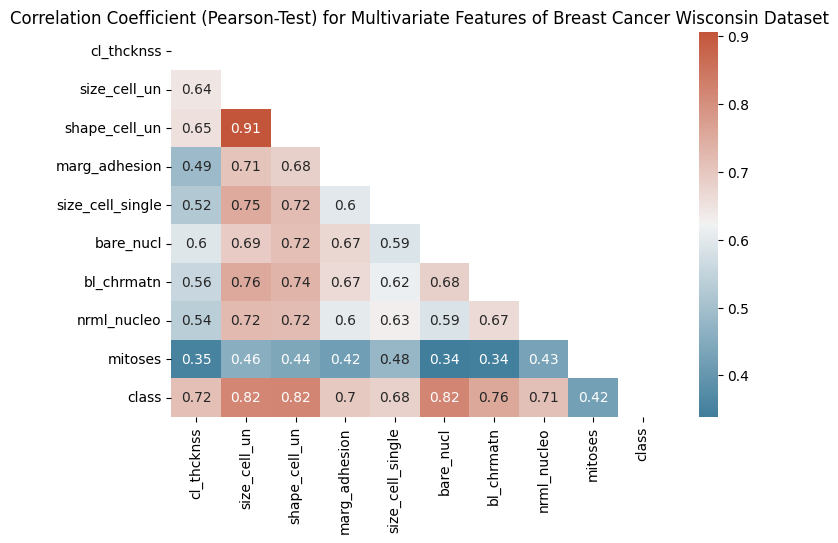

In [12]:
#---Pearson's Test using seaborn

corr = df.corr()
f, ax = plt.subplots(figsize=(8, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Correlation Coefficient (Pearson-Test) for Multivariate Features of Breast Cancer Wisconsin Dataset")
plt.show()

# Functions - Supervised Learning

In [13]:
def supervised_ml(algo_name,algorithm,cv_method):
    # Cross-Validation for small datasets to prevent biased and overfitting of model
    cv = cv_method()
    # Run supervised learning - Logistic Regression algorithm
    model = algorithm
    
    # LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
    predictions = []
    probabilities = []
    scores = []
    
    # Loop through the cross-validation splits/observations
    for train_index, test_index in cv.split(X_scaled):
        # While splitting data into training and test sets
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train classifier
        model.fit(X_train,y_train)

        # Get prediction
        predicted_y = model.predict(X_test)

        # Get probability
        probability_y = model.predict_proba(X_test)[:,1]

        # Append each predicted label and probability score into list
        predictions.append(predicted_y[0])
        probabilities.append(probability_y[0])
        scores.append(accuracy_score(y_test, predicted_y))

    # Convert the lists to a Numpy Array
    predictions = np.array(predictions)
    probabilities = np.array(probabilities)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y,predictions)

    # Calculate the mean accuracy
    accuracy = sum(scores) / len(scores)
    print(f"{algo_name} Accuracy Score:", accuracy)
    
    # Calculate false +ve rate, true +ve rate and threshold values
    fpr, tpr, thresholds = roc_curve(y,probabilities)

    # Calculate area under the curve
    roc_auc = roc_auc_score(y,probabilities)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.title(f'{algo_name} Classification ROC')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Plot confusion matrix using Seaborn Heatmap
    sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
    plt.title(f'{algo_name} Classification Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    
    # Comprehensive Classification Report
    print(f'{algo_name} Classification Report')
    print(classification_report(y, predictions))
    
    # Combine the true labels and predicted labels into a dataframe
    df2 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
    
    return predictions,probabilities,accuracy,cm,df2

# Logistic Regression

Logistic Regression Accuracy Score: 0.9642346208869814


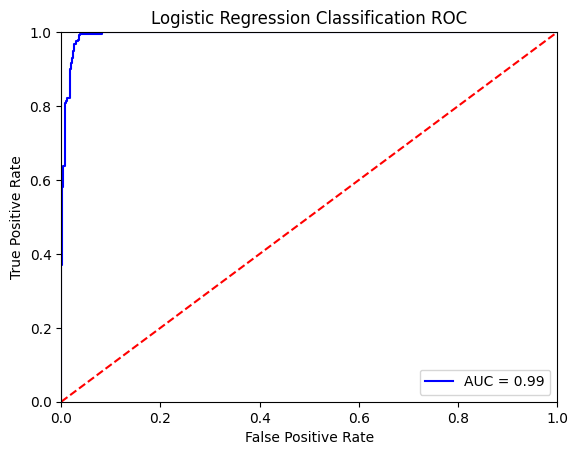

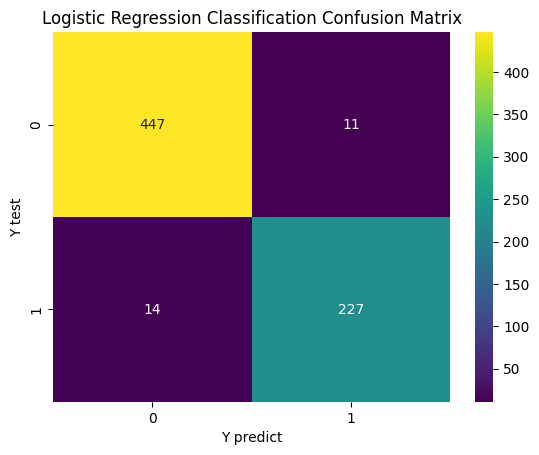

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       458
           1       0.95      0.94      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [14]:
logreg = supervised_ml('Logistic Regression',LogisticRegression(),LeaveOneOut)

In [15]:
#Actual vs Predicted values
logreg[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Naive Bayes - Gaussian

Naive Bayes - Gaussian Accuracy Score: 0.9585121602288984


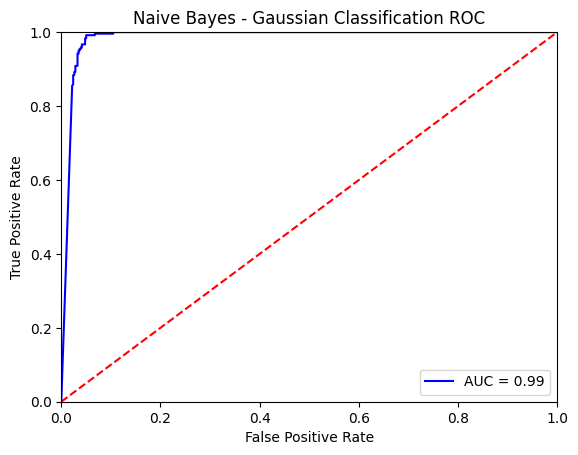

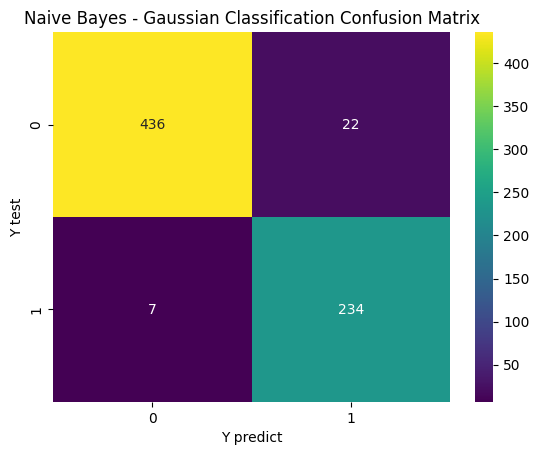

Naive Bayes - Gaussian Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       458
           1       0.91      0.97      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



In [16]:
nbcla = supervised_ml('Naive Bayes - Gaussian',GaussianNB(),LeaveOneOut)

In [17]:
#Actual vs Predicted values
nbcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Support Vector Machine (SVM)

Support Vector Machine Accuracy Score: 0.9570815450643777


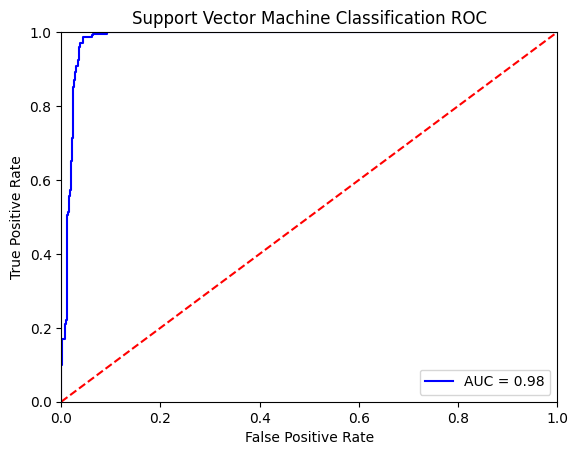

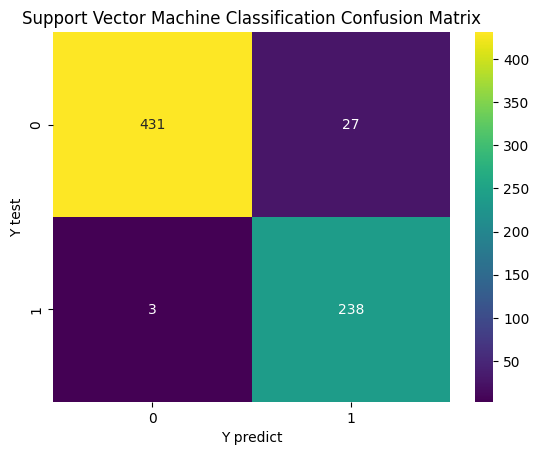

Support Vector Machine Classification Report
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       458
           1       0.90      0.99      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



In [18]:
svmcla = supervised_ml('Support Vector Machine',svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
        max_iter=-1, probability=True, random_state=None, shrinking=False,
        tol=0.001, verbose=False),LeaveOneOut)

In [19]:
#Actual vs Predicted values
svmcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# K-Nearest Neighbour (KNN)

K-Nearest Neighbors Accuracy Score: 0.9642346208869814


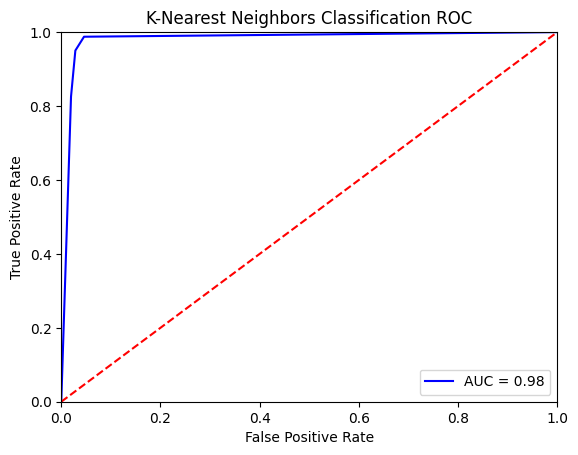

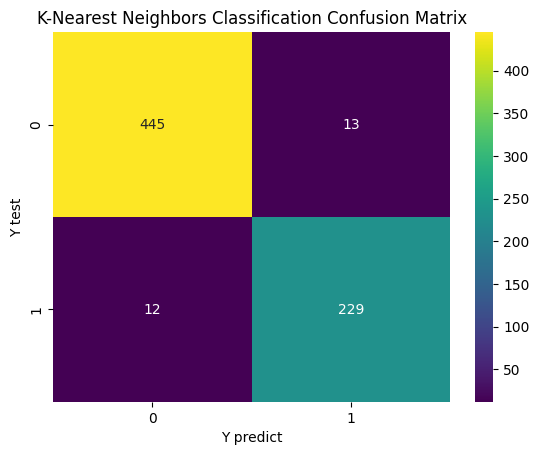

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       458
           1       0.95      0.95      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [20]:
knncla = supervised_ml('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=3),LeaveOneOut)

In [21]:
#Actual vs Predicted values
knncla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Random Forest Classifier

Random Forest Accuracy Score: 0.9713876967095851


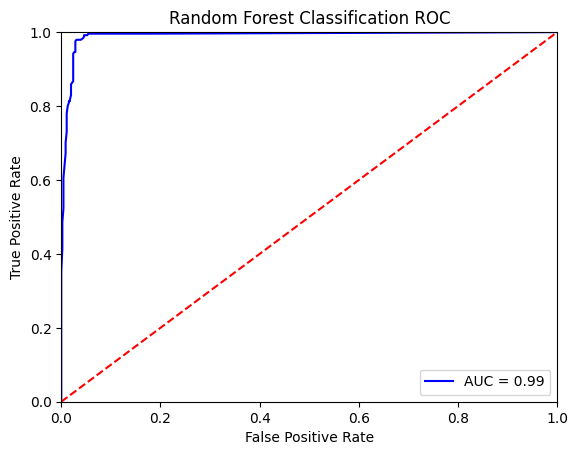

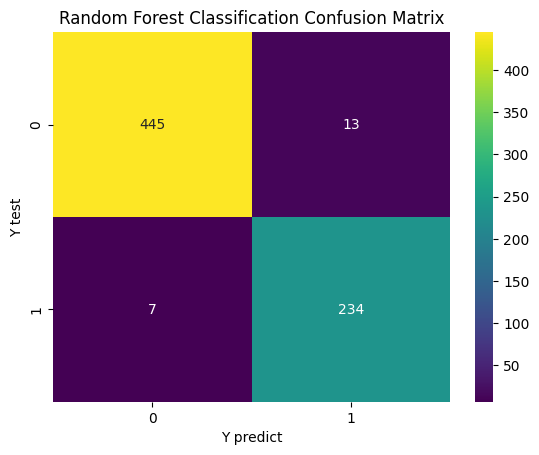

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       458
           1       0.95      0.97      0.96       241

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



In [22]:
rfcla = supervised_ml('Random Forest',RandomForestClassifier(),LeaveOneOut)

In [23]:
rfcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Decision Tree Classifier

Decision Tree Accuracy Score: 0.9470672389127325


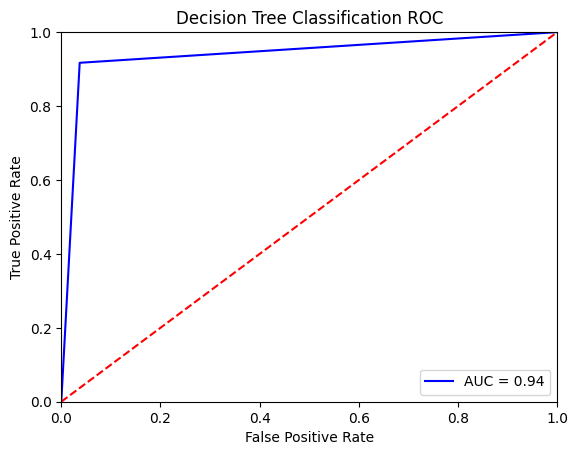

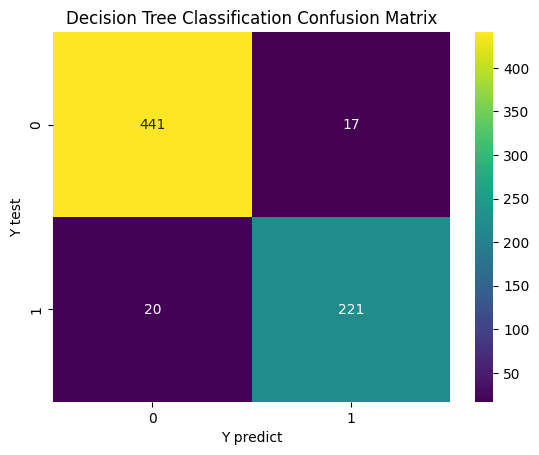

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       458
           1       0.93      0.92      0.92       241

    accuracy                           0.95       699
   macro avg       0.94      0.94      0.94       699
weighted avg       0.95      0.95      0.95       699



In [24]:
dtcla = supervised_ml('Decision Tree',DecisionTreeClassifier(),LeaveOneOut)

In [25]:
dtcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Neural Network

D:\OneDrive\OneDrive - mysnomed.com\Semester 1\303\Project\Group\303A_machinelearning\neural_network.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df.append(new_data, ignore_index=True)


Epoch 1/500
33/33 [==============================] - 1s 1ms/step - loss: 0.7425 - accuracy: 0.5735
Epoch 2/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6317
Epoch 3/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6727
Epoch 4/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6966
Epoch 5/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7004
Epoch 6/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7242
Epoch 7/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7471
Epoch 8/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.7433
Epoch 9/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7462
Epoch 10/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7300
Epoch 11/

33/33 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.8569
Epoch 84/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2626 - accuracy: 0.8473
Epoch 85/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8540
Epoch 86/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8454
Epoch 87/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8483
Epoch 88/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8531
Epoch 89/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8712
Epoch 90/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8473
Epoch 91/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8521
Epoch 92/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.8788
Epoch 93/500


33/33 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.8750
Epoch 246/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2236 - accuracy: 0.8731
Epoch 247/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.8836
Epoch 248/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2101 - accuracy: 0.8884
Epoch 249/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.8826
Epoch 250/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.8731
Epoch 251/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.8989
Epoch 252/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.8807
Epoch 253/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.8979
Epoch 254/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.8826
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.8960
Epoch 408/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.8903
Epoch 409/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.8884
Epoch 410/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.8769
Epoch 411/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.8874
Epoch 412/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.8931
Epoch 413/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.8884
Epoch 414/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.8941
Epoch 415/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.8931
Epoch 416/500
33/33 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.8941
Epoc

66/66 [==============================] - 0s 1ms/step - loss: 0.3027 - acc: 0.8540
Epoch 59/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2976 - acc: 0.8693
Epoch 60/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2840 - acc: 0.8588
Epoch 61/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2993 - acc: 0.8588
Epoch 62/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2817 - acc: 0.8607
Epoch 63/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.3086 - acc: 0.8531
Epoch 64/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2897 - acc: 0.8607
Epoch 65/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2772 - acc: 0.8645
Epoch 66/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2890 - acc: 0.8597
Epoch 67/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2999 - acc: 0.8607
Epoch 68/1000
66/66 [==============================] -

66/66 [==============================] - 0s 1ms/step - loss: 0.2666 - acc: 0.8626
Epoch 144/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2856 - acc: 0.8531
Epoch 145/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2746 - acc: 0.8635
Epoch 146/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2707 - acc: 0.8731
Epoch 147/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2890 - acc: 0.8435
Epoch 148/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2817 - acc: 0.8540
Epoch 149/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8588
Epoch 150/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2801 - acc: 0.8702
Epoch 151/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2709 - acc: 0.8540
Epoch 152/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2898 - acc: 0.8645
Epoch 153/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2642 - acc: 0.8693
Epoch 312/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2662 - acc: 0.8635
Epoch 313/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2723 - acc: 0.8626
Epoch 314/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2586 - acc: 0.8464
Epoch 315/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2675 - acc: 0.8779
Epoch 316/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2696 - acc: 0.8521
Epoch 317/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2613 - acc: 0.8693
Epoch 318/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2643 - acc: 0.8626
Epoch 319/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2754 - acc: 0.8645
Epoch 320/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2679 - acc: 0.8655
Epoch 321/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2773 - acc: 0.8473
Epoch 480/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2533 - acc: 0.8740
Epoch 481/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2601 - acc: 0.8731
Epoch 482/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2612 - acc: 0.8616
Epoch 483/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2564 - acc: 0.8769
Epoch 484/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2869 - acc: 0.8397
Epoch 485/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2607 - acc: 0.8492
Epoch 486/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2625 - acc: 0.8597
Epoch 487/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2523 - acc: 0.8693
Epoch 488/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2677 - acc: 0.8550
Epoch 489/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2708 - acc: 0.8655
Epoch 648/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2579 - acc: 0.8607
Epoch 649/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2546 - acc: 0.8550
Epoch 650/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2565 - acc: 0.8635
Epoch 651/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2477 - acc: 0.8616
Epoch 652/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2540 - acc: 0.8769
Epoch 653/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2755 - acc: 0.8511
Epoch 654/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2797 - acc: 0.8464
Epoch 655/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2314 - acc: 0.8769
Epoch 656/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2816 - acc: 0.8511
Epoch 657/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2694 - acc: 0.8607
Epoch 816/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2618 - acc: 0.8664
Epoch 817/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2558 - acc: 0.8531
Epoch 818/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2413 - acc: 0.8788
Epoch 819/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2270 - acc: 0.8855
Epoch 820/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2409 - acc: 0.8693
Epoch 821/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2570 - acc: 0.8760
Epoch 822/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2600 - acc: 0.8578
Epoch 823/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2706 - acc: 0.8454
Epoch 824/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2721 - acc: 0.8645
Epoch 825/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2402 - acc: 0.8817
Epoch 984/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2516 - acc: 0.8616
Epoch 985/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2559 - acc: 0.8664
Epoch 986/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2565 - acc: 0.8683
Epoch 987/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2445 - acc: 0.8626
Epoch 988/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2458 - acc: 0.8664
Epoch 989/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2681 - acc: 0.8569
Epoch 990/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.2536 - acc: 0.8550
Epoch 991/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2602 - acc: 0.8683
Epoch 992/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2493 - acc: 0.8635
Epoch 993/1000
66/66 [=======================

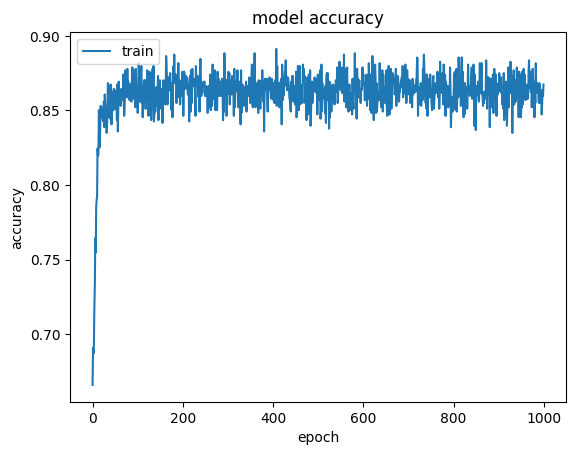

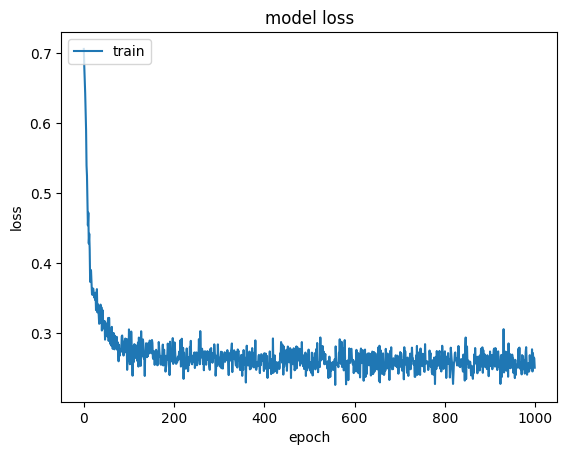

22/22 [==============================] - 0s 1ms/step - loss: 0.0804 - acc: 0.9800
score =  [0.08040296286344528, 0.9800000190734863]
11/11 [==============================] - 0s 1ms/step


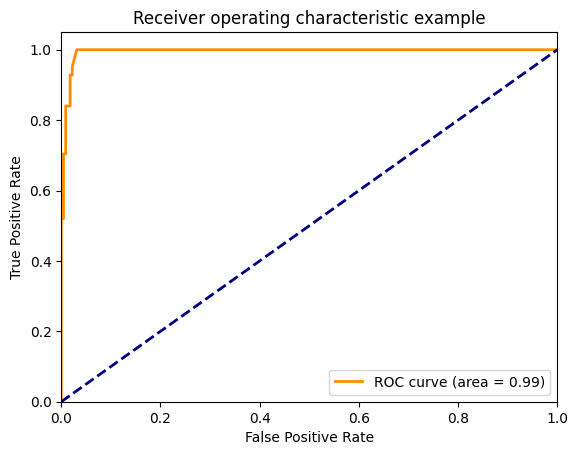

In [26]:
neural_network(df)

# Evaluation Metrics Summary

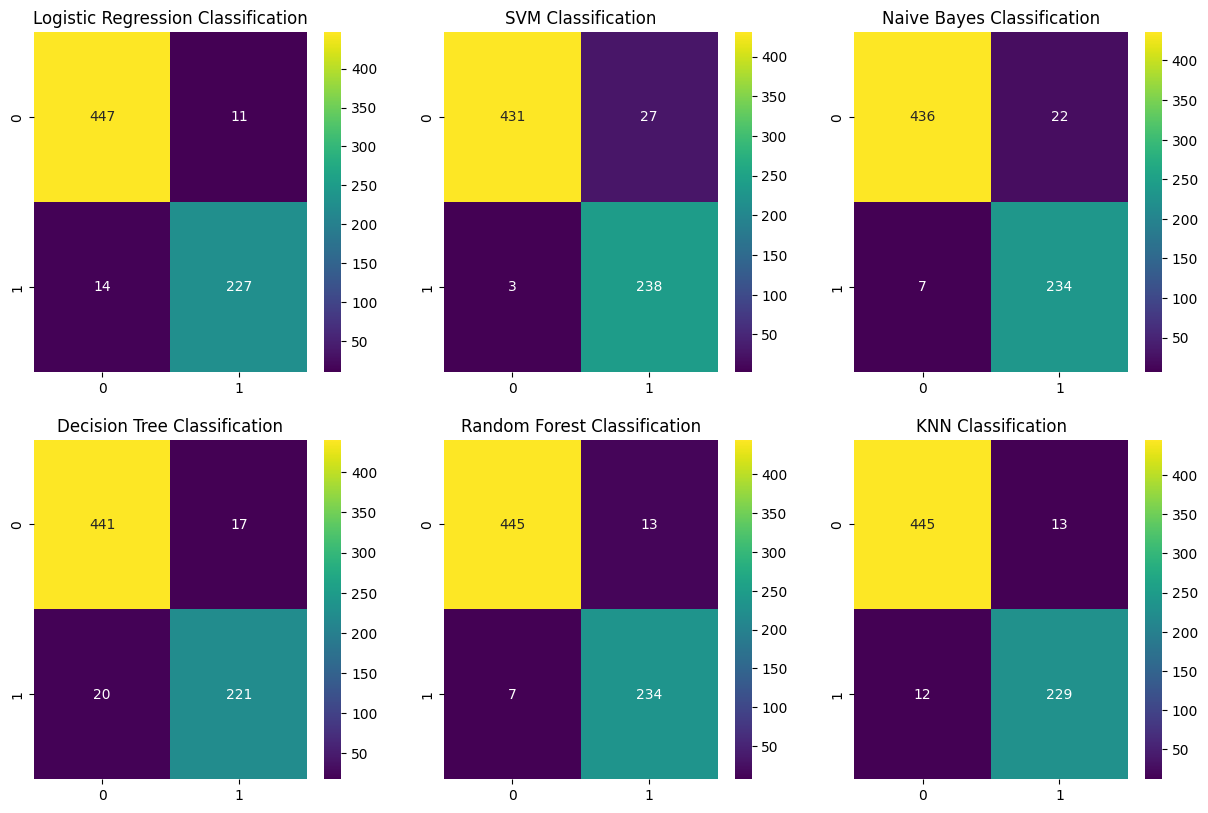

In [27]:
# The confusion matrix
# Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm for supervised learning.
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg[3], annot=True,cmap="viridis" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax6)
plt.show()

In [28]:
# Comparison of classification techniques
Accuracyscores = pd.Series([logreg[2], svmcla[2], nbcla[2], dtcla[2], rfcla[2], knncla[2]], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Accuracyscores)

Logistic Regression Score       0.964235
Support Vector Machine Score    0.957082
Naive Bayes Score               0.958512
Decision Tree Score             0.947067
Random Forest Score             0.971388
K-Nearest Neighbour Score       0.964235
dtype: float64
